# **Machine Learning to Predict Titanic Survivors **
Hi, I'm a current undergraduate student interested in the Data Science and Machine Learning field. In this Kernel, I will step by step process messy data and build a ML model  to predict the survival of each passenger aboard the Titanic. This guide is meant for people starting with data visualization, analysis and Machine Learning. If that sounds like you, then you're in the right place! It is not as difficult as you think to understand.



## **Classification vs. Regression**
As you know, predicting Titanic survivors is a supervised classification Machine Learning problem, where you classify a passenger as either survived, or not survived. Whereas in regression, you predict a continuous value like house price.

> ### Note:
You might see some people in this competition get incredibly high accuracies, sometimes even 100%. These people are likely extremely overfitting their models, or cheating since the test set survivors are available publicly online. You can always improve your model, but overfitting it just for higher score isn't good practice. 

# **Contents**
1. [Importing Libraries and Packages](#p1)
2. [Loading and Viewing Data Set](#p2)
3. [Dealing with NaN Values (Imputation)](#p3)
4. [Plotting and Visualizing Data](#p4)
5. [Feature Engineering](#p5)
6. [Feature Rescaling](#p6)
7. [Modeling and Predicting with sklearn](#p7)
8. [Evaluating Model Performances](#p8)
9. [Submission](#p9)

<a id="p1"></a>
# **1. Importing Libraries and Packages**
We will use these packages to help us manipulate the data and visualize the features/labels as well as measure how well our model performed. Numpy and Pandas are helpful for manipulating the dataframe and its columns and cells. We will use matplotlib along with Seaborn to visualize our data.

In [ ]:
import numpy as np 
import pandas as pd 

import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os 
#print(os.listdir("https://www.kaggle.com/c/titanic"))

<a id="p2"></a>
# **2. Loading and Viewing Data Set**
With Pandas, we can load both the training and testing set that we wil later use to train and test our model. Before we begin, we should take a look at our data table to see the values that we'll be working with. We can use the head and describe function to look at some sample data and statistics. We can also look at its keys and column names.

In [ ]:
training = pd.read_csv("train.csv")
testing = pd.read_csv("test.csv")

In [ ]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


This data looks very messy! We're going to have to preprocess it before it's ready to be used in Machine Learning models.

In [ ]:
print(training.keys())
print(testing.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
types_train = training.dtypes
num_values = types_train[(types_train == float)]

print("These are the numerical features:")
print(num_values)

These are the numerical features:
Age     float64
Fare    float64
dtype: object


In [ ]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


>**Note:** Only Age and Fare are the actual numerical values above and that the other features are just represented with numbers.

In [ ]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<a id="p3"></a>
# **3. Dealing with NaN Values (Imputation)**
There are NaN values in our data set in the age column. Furthermore, the Cabin column has a lot of missing values as well. These NaN values will get in the way of training our model. We need to fill in the NaN values with replacement values in order for the model to have a complete prediction for every row in the data set. This process is known as **imputation** and we will show how to replace the missing data.

In [ ]:
def null_table(training, testing):
    print("Training Data Frame")
    print(pd.isnull(training).sum()) 
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(testing).sum())

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Wow! Cabin has a lot of missing values. Also, it seems as though the Ticket feature is too noisy to be useful. We can probably drop both features without it impacting the performance of our model.

In [ ]:
training.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
testing.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


We take a look at the distribution of the Age column to see if it's skewed or symmetrical. This will help us determine what value to replace the NaN values.

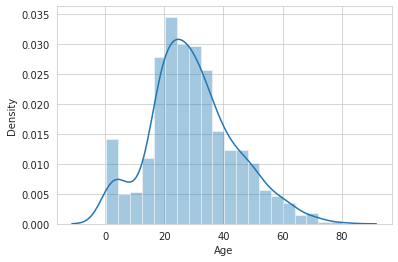

In [ ]:
copy = training.copy()
copy.dropna(inplace = True)
sns.distplot(copy["Age"])

Looks like the distribution of ages is slightly skewed right. Because of this, we can fill in the null values with the median for the most accuracy. 
> **Note:** We do not want to fill with the mean because the skewed distribution means that very large values on one end will greatly impact the mean, as opposed to the median, which will only be slightly impacted.

In [ ]:
#the median will be an acceptable value to place in the NaN cells
training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(testing["Age"].median(), inplace = True) 
training["Embarked"].fillna("S", inplace = True)
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


Nice! No more missing values. Now let's take a look at our imputed data.

In [ ]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


<a id="p4"></a>
# **4. Plotting and Visualizing Data**
It is very important to understand and visualize any data we are going to use in a machine learning model. By visualizing, we can see the trends and general associations of variables like Sex and Age with survival rate. We can make several different graphs for each feature we want to work with to see the entropy and information gain of the feature. 

**Gender**

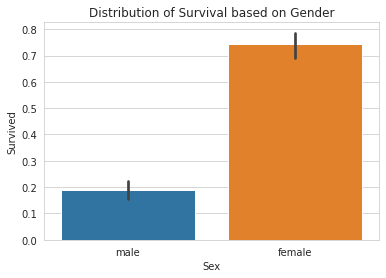

Total people survived is: 342
Proportion of Females who survived:
0.6812865497076024
Proportion of Males who survived:
0.31871345029239767


In [ ]:
#can ignore the testing set for now
sns.barplot(x="Sex", y="Survived", data=training)
plt.title("Distribution of Survival based on Gender")
plt.show()

total_survived_females = training[training.Sex == "female"]["Survived"].sum()
total_survived_males = training[training.Sex == "male"]["Survived"].sum()

print("Total people survived is: " + str((total_survived_females + total_survived_males)))
print("Proportion of Females who survived:") 
print(total_survived_females/(total_survived_females + total_survived_males))
print("Proportion of Males who survived:")
print(total_survived_males/(total_survived_females + total_survived_males))

> **Note:** The numbers printed above are the proportion of male/female survivors of all the surviviors ONLY. The graph shows the propotion of male/females out of ALL the passengers including those that didn't survive.

Gender appears to be a very good feature to use to predict survival, as shown by the large difference in propotion survived. Let's take a look at how class plays a role in survival as well.

**Class**

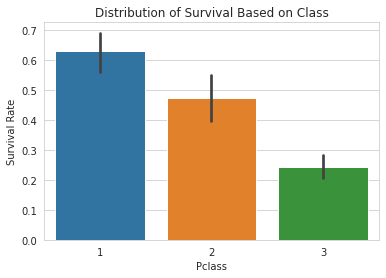

Total people survived is: 342
Proportion of Class 1 Passengers who survived:
0.39766081871345027
Proportion of Class 2 Passengers who survived:
0.2543859649122807
Proportion of Class 3 Passengers who survived:
0.347953216374269


In [ ]:
sns.barplot(x="Pclass", y="Survived", data=training)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

total_survived_one = training[training.Pclass == 1]["Survived"].sum()
total_survived_two = training[training.Pclass == 2]["Survived"].sum()
total_survived_three = training[training.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total people survived is: " + str(total_survived_class))
print("Proportion of Class 1 Passengers who survived:") 
print(total_survived_one/total_survived_class)
print("Proportion of Class 2 Passengers who survived:")
print(total_survived_two/total_survived_class)
print("Proportion of Class 3 Passengers who survived:")
print(total_survived_three/total_survived_class)

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

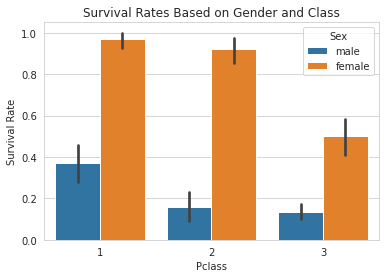

In [ ]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

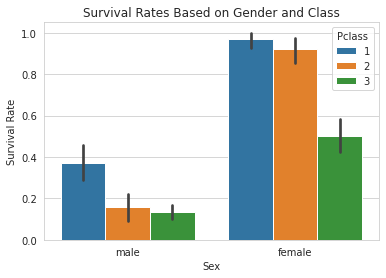

In [ ]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

It appears that class also plays a role in survival, as shown by the bar graph. People in Pclass 1 were more likely to survive than people in the other 2 Pclasses.

**Age**

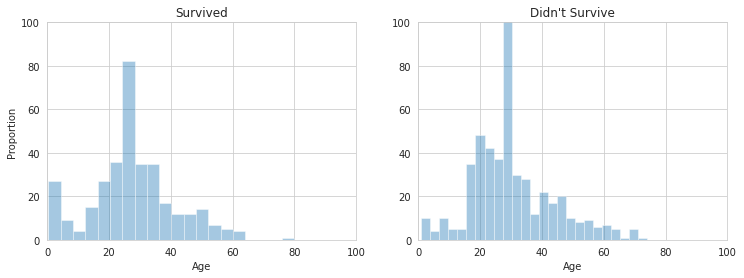

In [ ]:
survived_ages = training[training.Survived == 1]["Age"]
not_survived_ages = training[training.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.subplots_adjust(right=1.7)
plt.show()

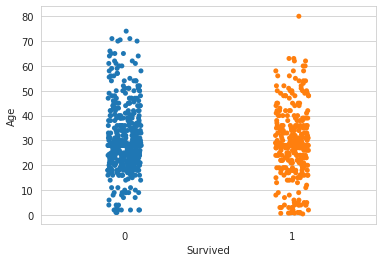

In [ ]:
sns.stripplot(x="Survived", y="Age", data=training, jitter=True)

It appears as though passengers in the younger range of ages were more likely to survive than those in the older range of ages, as seen by the clustering in the strip plot, as well as the survival distributions of the histogram.

Here is one final cumulative graph of a pair plot that shows the relations between all of the different features

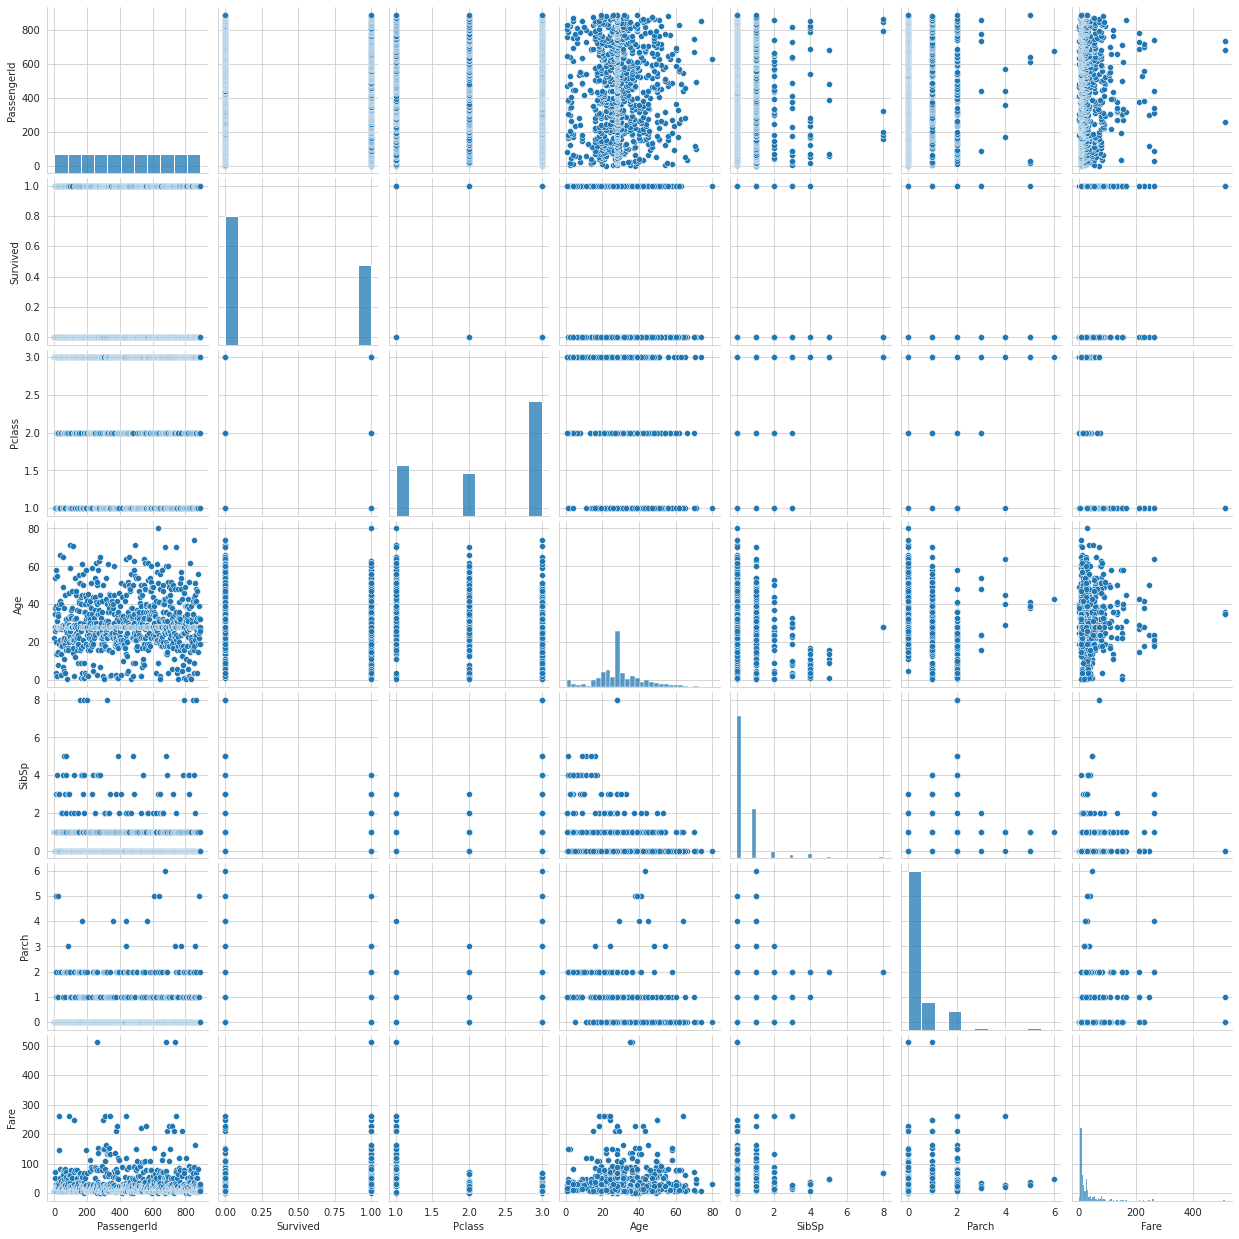

In [ ]:
sns.pairplot(training)

<a id="p5"></a>
# **5. Feature Engineering**
Because values in the Sex and Embarked columns are categorical values, we have to represent these strings as numerical values in order to perform our classification with our model. We can also do this process through **One-Hot-Encoding**.

In [ ]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
503,504,0,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,9.5875,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,15.8500,S
294,295,0,3,"Mineff, Mr. Ivan",male,24.0,0,0,7.8958,S
135,136,0,2,"Richard, Mr. Emile",male,23.0,0,0,15.0458,C
757,758,0,2,"Bailey, Mr. Percy Andrew",male,18.0,0,0,11.5000,S


In [ ]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
79,971,3,"Doyle, Miss. Elizabeth",female,24.0,0,0,7.7500,Q
82,974,1,"Case, Mr. Howard Brown",male,49.0,0,0,26.0000,S
355,1247,1,"Julian, Mr. Henry Forbes",male,50.0,0,0,26.0000,S
65,957,2,"Corey, Mrs. Percy C (Mary Phyllis Elizabeth Mi...",female,27.0,0,0,21.0000,S
23,915,1,"Williams, Mr. Richard Norris II",male,21.0,0,1,61.3792,C


We change Sex to binary, as either 1 for female or 0 for male. We do the same for Embarked. We do this same process on both the training and testing set to prepare our data for Machine Learning.

In [ ]:
set(training["Embarked"])

{'C', 'Q', 'S'}

There are 3 values for Embarked: *S*, *C*, and *Q*. We will represent these with numbers as well.

In [ ]:
''' from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_sex.fit(training["Sex"])

encoded_sex_training = le_sex.transform(training["Sex"])
training["Sex"] = encoded_sex_training
encoded_sex_testing = le_sex.transform(testing["Sex"])
testing["Sex"] = encoded_sex_testing

le_embarked = LabelEncoder()
le_embarked.fit(training["Embarked"])

encoded_embarked_training = le_embarked.transform(training["Embarked"])
training["Embarked"] = encoded_embarked_training
encoded_embarked_testing = le_embarked.transform(testing["Embarked"])
testing["Embarked"] = encoded_embarked_testing '''

#Here's how to do it manually in Python without packages

training.loc[training["Sex"] == "male", "Sex"] = 0
training.loc[training["Sex"] == "female", "Sex"] = 1

training.loc[training["Embarked"] == "S", "Embarked"] = 0
training.loc[training["Embarked"] == "C", "Embarked"] = 1
training.loc[training["Embarked"] == "Q", "Embarked"] = 2

testing.loc[testing["Sex"] == "male", "Sex"] = 0
testing.loc[testing["Sex"] == "female", "Sex"] = 1

testing.loc[testing["Embarked"] == "S", "Embarked"] = 0
testing.loc[testing["Embarked"] == "C", "Embarked"] = 1
testing.loc[testing["Embarked"] == "Q", "Embarked"] = 2


In [ ]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
58,59,1,2,"West, Miss. Constance Mirium",1,5.0,1,2,27.750,0
354,355,0,3,"Yousif, Mr. Wazli",0,28.0,0,0,7.225,1
733,734,0,2,"Berriman, Mr. William John",0,23.0,0,0,13.000,0
303,304,1,2,"Keane, Miss. Nora A",1,28.0,0,0,12.350,2
693,694,0,3,"Saad, Mr. Khalil",0,25.0,0,0,7.225,1


In [ ]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
417,1309,3,"Peter, Master. Michael J",0,27.0,1,1,22.3583,1
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",1,27.0,0,0,31.6833,0
319,1211,2,"Jefferys, Mr. Ernest Wilfred",0,22.0,2,0,31.5000,0
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,29.0000,0
25,917,3,"Robins, Mr. Alexander A",0,50.0,1,0,14.5000,0


## *Creating Synthetic Features*
Sometimes it is useful to create synthetic features that we think may help us predict the target value. 

We can combine SibSp and Parch into one synthetic feature called family size, which indicates the total number of family members on board for each member. 

In [ ]:
training["FamSize"] = training["SibSp"] + training["Parch"] + 1
testing["FamSize"] = testing["SibSp"] + testing["Parch"] + 1

This IsAlone feature also may work well with the data we're dealing with, telling us whether the passenger was along or not on the ship.

In [ ]:
training["IsAlone"] = training.FamSize.apply(lambda x: 1 if x == 1 else 0)
testing["IsAlone"] = testing.FamSize.apply(lambda x: 1 if x == 1 else 0)

Although it may not seem like it, we can also extract some useful information from the name column. Not the actual names themselves, but the title of their names like Ms. or Mr. This may also provide a hint as to whether the passenger survived or not. Therefore we can extract this title and then encode it like we did for Sex and Embarked.

In [ ]:
for name in training["Name"]:
    training["Title"] = training["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
for name in testing["Name"]:
    testing["Title"] = testing["Name"].str.extract("([A-Za-z]+)\.",expand=True)

In [ ]:
training.head() #Title column added

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,1,1,Mr


In [ ]:
titles = set(training["Title"]) #making it a set gets rid of all duplicates
print(titles)

{'Master', 'Mlle', 'Dr', 'Mme', 'Major', 'Lady', 'Col', 'Miss', 'Don', 'Countess', 'Rev', 'Jonkheer', 'Sir', 'Mr', 'Mrs', 'Ms', 'Capt'}


In [ ]:
title_list = list(training["Title"])
frequency_titles = []

for i in titles:
    frequency_titles.append(title_list.count(i))
    
print(frequency_titles)

[40, 2, 7, 1, 2, 1, 2, 182, 1, 1, 6, 1, 1, 517, 125, 1, 1]


In [ ]:
titles = list(titles)

title_dataframe = pd.DataFrame({
    "Titles" : titles,
    "Frequency" : frequency_titles
})

print(title_dataframe)

      Titles  Frequency
0     Master         40
1       Mlle          2
2         Dr          7
3        Mme          1
4      Major          2
5       Lady          1
6        Col          2
7       Miss        182
8        Don          1
9   Countess          1
10       Rev          6
11  Jonkheer          1
12       Sir          1
13        Mr        517
14       Mrs        125
15        Ms          1
16      Capt          1


In [ ]:
from sklearn.preprocessing import LabelEncoder
title_replacements = {"Mlle": "Other", "Major": "Other", "Col": "Other", "Sir": "Other", "Don": "Other", "Mme": "Other",
          "Jonkheer": "Other", "Lady": "Other", "Capt": "Other", "Countess": "Other", "Ms": "Other", "Dona": "Other"}

training.replace({"Title": title_replacements}, inplace=True)
testing.replace({"Title": title_replacements}, inplace=True)

le_title = LabelEncoder()
le_title.fit(training["Title"])

encoded_title_training = le_title.transform(training["Title"])
training["Title"] = encoded_title_training
encoded_title_testing = le_title.transform(testing["Title"])
testing["Title"] = encoded_title_testing

#Again, here's how to do it manually
"""
training.loc[training["Title"] == "Miss", "Title"] = 0
training.loc[training["Title"] == "Mr", "Title"] = 1
training.loc[training["Title"] == "Mrs", "Title"] = 2
training.loc[training["Title"] == "Master", "Title"] = 3
training.loc[training["Title"] == "Dr", "Title"] = 4
training.loc[training["Title"] == "Rev", "Title"] = 5
training.loc[training["Title"] == "Other", "Title"] = 6

testing.loc[testing["Title"] == "Miss", "Title"] = 0
testing.loc[testing["Title"] == "Mr", "Title"] = 1
testing.loc[testing["Title"] == "Mrs", "Title"] = 2
testing.loc[testing["Title"] == "Master", "Title"] = 3
testing.loc[testing["Title"] == "Dr", "Title"] = 4
testing.loc[testing["Title"] == "Rev", "Title"] = 5
testing.loc[testing["Title"] == "Other", "Title"] = 6 """

'\ntraining.loc[training["Title"] == "Miss", "Title"] = 0\ntraining.loc[training["Title"] == "Mr", "Title"] = 1\ntraining.loc[training["Title"] == "Mrs", "Title"] = 2\ntraining.loc[training["Title"] == "Master", "Title"] = 3\ntraining.loc[training["Title"] == "Dr", "Title"] = 4\ntraining.loc[training["Title"] == "Rev", "Title"] = 5\ntraining.loc[training["Title"] == "Other", "Title"] = 6\n\ntesting.loc[testing["Title"] == "Miss", "Title"] = 0\ntesting.loc[testing["Title"] == "Mr", "Title"] = 1\ntesting.loc[testing["Title"] == "Mrs", "Title"] = 2\ntesting.loc[testing["Title"] == "Master", "Title"] = 3\ntesting.loc[testing["Title"] == "Dr", "Title"] = 4\ntesting.loc[testing["Title"] == "Rev", "Title"] = 5\ntesting.loc[testing["Title"] == "Other", "Title"] = 6 '

In [ ]:
training.drop("Name", axis = 1, inplace = True)
testing.drop("Name", axis = 1, inplace = True)

In [ ]:
training.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
25,26,1,3,1,38.0,1,5,31.3875,0,7,0,4
288,289,1,2,0,42.0,0,0,13.0000,0,1,1,3
28,29,1,3,1,28.0,0,0,7.8792,2,1,1,2
606,607,0,3,0,30.0,0,0,7.8958,0,1,1,3
344,345,0,2,0,36.0,0,0,13.0000,0,1,1,3


In [ ]:
testing.sample(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
177,1069,1,0,54.0,1,0,55.4417,1,2,0,3
200,1092,3,1,27.0,0,0,15.5000,2,1,1,2
109,1001,2,0,18.5,0,0,13.0000,0,1,1,3
78,970,2,0,30.0,0,0,13.0000,0,1,1,3
230,1122,2,0,14.0,0,0,65.0000,0,1,1,3


Cool! All the features are in numerical form now. It is ready to be fed into our model. Before we do that however, there's something else that we should notice when looking at the preprocessed data. Particularly, the Age and Fare feature values.

<a id="p6"></a>
# **6. Feature Rescaling**
 the Age and Fare features values deviate heavily from the other features. This may cause some problems when we are modelling, since it may make these features seem more important than others. It would be beneficial to scale them so they are more representative. We can do this with both a MinMaxScaler or a StandardScaler. I will do this with a StandardScaler. The steps are shown below.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#We need to reshape our data since the Scaler takes in arrays
ages_train = np.array(training["Age"]).reshape(-1, 1)
fares_train = np.array(training["Fare"]).reshape(-1, 1)
ages_test = np.array(testing["Age"]).reshape(-1, 1)
fares_test = np.array(testing["Fare"]).reshape(-1, 1)

training["Age"] = scaler.fit_transform(ages_train)
training["Fare"] = scaler.fit_transform(fares_train)
testing["Age"] = scaler.fit_transform(ages_test)
testing["Fare"] = scaler.fit_transform(fares_test)

#You can try with MinMaxScaler as well to see how it performs in comparison, just replace StandardScaler with MinMaxScaler

In [ ]:
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,1,0,3,0,-0.565736,1,0,-0.502445,0,2,0,3
1,2,1,1,1,0.663861,1,0,0.786845,1,2,0,4
2,3,1,3,1,-0.258337,0,0,-0.488854,0,1,1,2
3,4,1,1,1,0.433312,1,0,0.420730,0,2,0,4
4,5,0,3,0,0.433312,0,0,-0.486337,0,1,1,3


In [ ]:
testing.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,892,3,0,0.386231,0,0,-0.497413,2,1,1,3
1,893,3,1,1.371370,1,0,-0.512278,0,2,0,4
2,894,2,0,2.553537,0,0,-0.464100,2,1,1,3
3,895,3,0,-0.204852,0,0,-0.482475,0,1,1,3
4,896,3,1,-0.598908,1,1,-0.417492,0,3,0,4


This feature scaling may allow for higher accuracy for our models because of the reduced weight of their magnitudes!

<a id="p7"></a>
# **7. Model Fitting, Optimizing, and Predicting**
Now that our data has been processed and formmated properly, and that we understand the general data we're working with as well as the trends and associations, we can start to build our model. We can import different classifiers from sklearn. We will try different types of models to see which one gives the best accuracy for its predictions.

**sklearn Models to Test**

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

To evaluate our model performance, we can use the make_scorer and accuracy_score function from sklearn metrics.

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score 

We can also use a GridSearch cross validation to find the optimal parameters for the model we choose to work with and use to predict on our testing set.

In [ ]:
from sklearn.model_selection import GridSearchCV

**Defining Features in Training/Test Set**

In [ ]:
X_train = training.drop(labels=["PassengerId", "Survived"], axis=1) #define training features set
y_train = training["Survived"] #define training label set
X_test = testing.drop("PassengerId", axis=1) #define testing features set
#we don't have y_test, that is what we're trying to predict with our model

In [ ]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,3,0,-0.565736,1,0,-0.502445,0,2,0,3
1,1,1,0.663861,1,0,0.786845,1,2,0,4
2,3,1,-0.258337,0,0,-0.488854,0,1,1,2
3,1,1,0.433312,1,0,0.420730,0,2,0,4
4,3,0,0.433312,0,0,-0.486337,0,1,1,3


In [ ]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,3,0,0.386231,0,0,-0.497413,2,1,1,3
1,3,1,1.371370,1,0,-0.512278,0,2,0,4
2,2,0,2.553537,0,0,-0.464100,2,1,1,3
3,3,0,-0.204852,0,0,-0.482475,0,1,1,3
4,3,1,-0.598908,1,1,-0.417492,0,3,0,4


**Validation Data Set**

Although we already have a test set, it is generally easy to overfit the data with these classifiers. It is therefore useful to have a third data set called the validation data set to ensure that our model doesn't overfit with the data. We can make this third data set with sklearn's train_test_split function. We can also use the validation data set to test the general accuracy of our model.

In [ ]:
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

In [ ]:
X_training.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
140,3,1,-0.104637,0,2,-0.341452,1,3,0,4
439,2,0,0.125912,0,0,-0.437007,0,1,1,3
817,2,0,0.125912,1,1,0.096646,1,3,0,3
378,3,0,-0.719436,0,0,-0.567631,1,1,1,3
491,3,0,-0.642586,0,0,-0.502445,0,1,1,3


**SVC Model**

In [ ]:
svc_clf = SVC() 
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import confusion_matrix
parameters_svc = {"kernel": ["rbf", "linear"], "probability": [True, False], "verbose": [True, False]}

grid_svc = GridSearchCV(svc_clf, parameters_svc, scoring = make_scorer(accuracy_score))
grid_svc.fit(X_training, y_training)

svc_clf = grid_svc.best_estimator_

svc_clf.fit(X_training, y_training)
pred_svc = svc_clf.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)
print(confusion_matrix(y_valid,pred_svc))

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][[95 15]
 [17 52]]


In [ ]:
print(confusion_matrix(y_valid,pred_svc))

[[95 15]
 [17 52]]


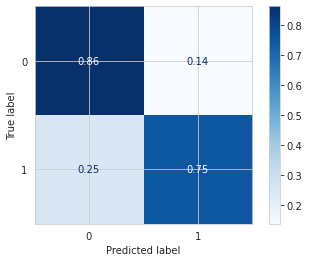

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(svc_clf,X_valid, y_valid, cmap=plt.cm.Blues, normalize='true')
plt.show()

In [ ]:
print("The Score for SVC is: " + str(acc_svc))

The Score for SVC is: 0.8212290502793296


**LinearSVC Model**

In [ ]:
linsvc_clf = LinearSVC()

parameters_linsvc = {"multi_class": ["ovr", "crammer_singer"], "fit_intercept": [True, False], "max_iter": [100, 500, 1000, 1500]}

grid_linsvc = GridSearchCV(linsvc_clf, parameters_linsvc, scoring=make_scorer(accuracy_score))
grid_linsvc.fit(X_training, y_training)

linsvc_clf = grid_linsvc.best_estimator_

linsvc_clf.fit(X_training, y_training)
pred_linsvc = linsvc_clf.predict(X_valid)
acc_linsvc = accuracy_score(y_valid, pred_linsvc)

print("The Score for LinearSVC is: " + str(acc_linsvc))

The Score for LinearSVC is: 0.7988826815642458


**RandomForest Model**

In [ ]:
rf_clf = RandomForestClassifier()

parameters_rf = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], "criterion": ["gini", "entropy"], "max_features": ["auto", "sqrt", "log2"], 
                 "max_depth": [2, 3, 5, 10], "min_samples_split": [2, 3, 5, 10]}

grid_rf = GridSearchCV(rf_clf, parameters_rf, scoring=make_scorer(accuracy_score))
grid_rf.fit(X_training, y_training)

rf_clf = grid_rf.best_estimator_

rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print("The Score for Random Forest is: " + str(acc_rf))

The Score for Random Forest is: 0.8324022346368715


**LogisiticRegression Model**

In [ ]:
logreg_clf = LogisticRegression()

parameters_logreg = {"penalty": ["l2"], "fit_intercept": [True, False], "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                     "max_iter": [50, 100, 200], "warm_start": [True, False]}

grid_logreg = GridSearchCV(logreg_clf, parameters_logreg, scoring=make_scorer(accuracy_score))
grid_logreg.fit(X_training, y_training)

logreg_clf = grid_logreg.best_estimator_

logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print("The Score for Logistic Regression is: " + str(acc_logreg))

The Score for Logistic Regression is: 0.8100558659217877


**KNeighbors Model**

In [ ]:
knn_clf = KNeighborsClassifier()

parameters_knn = {"n_neighbors": [3, 5, 10, 15], "weights": ["uniform", "distance"], "algorithm": ["auto", "ball_tree", "kd_tree"],
                  "leaf_size": [20, 30, 50]}

grid_knn = GridSearchCV(knn_clf, parameters_knn, scoring=make_scorer(accuracy_score))
grid_knn.fit(X_training, y_training)

knn_clf = grid_knn.best_estimator_

knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)

print("The Score for KNeighbors is: " + str(acc_knn))

The Score for KNeighbors is: 0.7877094972067039


**GaussianNB Model**

In [ ]:
gnb_clf = GaussianNB()

parameters_gnb = {}

grid_gnb = GridSearchCV(gnb_clf, parameters_gnb, scoring=make_scorer(accuracy_score))
grid_gnb.fit(X_training, y_training)

gnb_clf = grid_gnb.best_estimator_

gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)

print("The Score for Gaussian NB is: " + str(acc_gnb))

The Score for Gaussian NB is: 0.776536312849162


**DecisionTree Model**

In [ ]:
dt_clf = DecisionTreeClassifier()

parameters_dt = {"criterion": ["gini", "entropy"], "splitter": ["best", "random"], "max_features": ["auto", "sqrt", "log2"]}

grid_dt = GridSearchCV(dt_clf, parameters_dt, scoring=make_scorer(accuracy_score))
grid_dt.fit(X_training, y_training)

dt_clf = grid_dt.best_estimator_

dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)

print("The Score for Decision Tree is: " + str(acc_dt))

The Score for Decision Tree is: 0.7932960893854749


**XGBoost Model**

In [ ]:
''' from xgboost import XGBClassifier

xg_clf = XGBClassifier()

parameters_xg = {"objective" : ["reg:linear"], "n_estimators" : [5, 10, 15, 20]}

grid_xg = GridSearchCV(xg_clf, parameters_xg)#, scoring=make_scorer(accuracy_score))
grid_xg.fit(X_training, y_training)

xg_clf = grid_xg.best_estimator_

xg_clf.fit(X_training, y_training)
pred_xg = xg_clf.predict(X_valid)
acc_xg = accuracy_score(y_valid, pred_xg)

print("The Score for XGBoost is: " + str(acc_xg)) '''

ValueError: ignored

<a id="p8"></a>
# **8. Evaluating Model Performances**
After making so many models and predictions, we should evaluate and see which model performed the best and which model to use on our testing set.

In [ ]:
model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree"],
    "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
2,Random Forest,0.832402
0,SVC,0.821229
3,Logistic Regression,0.810056
1,Linear SVC,0.798883
6,Decision Tree,0.793296
4,K Nearest Neighbors,0.787709
5,Gaussian Naive Bayes,0.776536


In [ ]:
model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree", "XGBClassifier"],
    "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt, acc_xg]
})

model_performance.sort_values(by="Accuracy", ascending=False)

<a id="p9"></a>
# **9. Submission**
Let's create a dataframe to submit to the competition with our predictions of our model.

In [ ]:
svc_clf.fit(X_train, y_train)

In [ ]:
submission_predictions = svc_clf.predict(X_test)

In [ ]:
submission = pd.DataFrame({
        "PassengerId": testing["PassengerId"],
        "Survived": submission_predictions
    })

submission.to_csv("titanic.csv", index=False)
print(submission.shape)